In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, AUC

import matplotlib.pyplot as plt
import app
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 8
LEARN_RATE = 0.01

CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32
TRAIN_DATA_DIRECTORY = "augmented-data/train"
TEST_DATA_DIRECTORY = "augmented-data/test"

In [2]:
TRAIN_DATA_DIRECTORY = "Covid19-dataset/train"
TEST_DATA_DIRECTORY = "Covid19-dataset/test"

In [3]:
train_image_data_generator = ImageDataGenerator(rescale=1.0/255,
                                            zoom_range=0.2,
                                            rotation_range=15,
                                            width_shift_range=0.05,
                                            height_shift_range=0.05)

training_iterator = train_image_data_generator.flow_from_directory(TRAIN_DATA_DIRECTORY,
                                                                class_mode=CLASS_MODE,
                                                                color_mode=COLOR_MODE,
                                                                target_size=TARGET_SIZE,
                                                                batch_size=BATCH_SIZE)


test_image_data_generator = ImageDataGenerator(rescale=1.0/255)

test_iterator = test_image_data_generator.flow_from_directory(TEST_DATA_DIRECTORY,
                                                        class_mode=CLASS_MODE,
                                                        color_mode=COLOR_MODE,
                                                        target_size=TARGET_SIZE,
                                                        batch_size=BATCH_SIZE)

NameError: name 'CLASS_MODE' is not defined

In [4]:
NUM_EPOCHS = 20
BATCH_SIZE = 8
LEARN_RATE = 0.01

CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32

TRAIN_DATA_DIRECTORY = "Covid19-dataset/train"
TEST_DATA_DIRECTORY = "Covid19-dataset/test"


train_image_data_generator = ImageDataGenerator(rescale=1.0/255,
                                            zoom_range=0.2,
                                            rotation_range=15,
                                            width_shift_range=0.05,
                                            height_shift_range=0.05)

training_iterator = train_image_data_generator.flow_from_directory(TRAIN_DATA_DIRECTORY,
                                                                class_mode=CLASS_MODE,
                                                                color_mode=COLOR_MODE,
                                                                target_size=TARGET_SIZE,
                                                                batch_size=BATCH_SIZE)


test_image_data_generator = ImageDataGenerator(rescale=1.0/255)

test_iterator = test_image_data_generator.flow_from_directory(TEST_DATA_DIRECTORY,
                                                        class_mode=CLASS_MODE,
                                                        color_mode=COLOR_MODE,
                                                        target_size=TARGET_SIZE,
                                                        batch_size=BATCH_SIZE)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [5]:
### Design the model ###
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = (256,256,1)))

# add convolutional layers
model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Dense(16, activation = "relu"))

# add output layer that outputs 3 features/classes: Covid, Normal, or Viral Pneumonia
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation="softmax"))

model.compile(
            optimizer = tf.keras.optimizers.Adam(learning_rate=LEARN_RATE),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
            )

model.summary()

2022-07-01 13:08:53.002406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 8)        0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 15, 15, 16)        144       
                                                                 
 flatten (Flatten)           (None, 3600)              0

In [6]:
history = model.fit(
       training_iterator,
       steps_per_epoch = (training_iterator.samples)/BATCH_SIZE,
       epochs = NUM_EPOCHS,
       validation_data = test_iterator,
       validation_steps = (test_iterator.samples)/BATCH_SIZE
)

Epoch 1/20
7/7 [==============================] - 16s 2s/step - loss: 0.9793 - categorical_accuracy: 0.5378 - auc: 0.7428 - val_loss: 0.6762 - val_categorical_accuracy: 0.6818 - val_auc: 0.8799
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 0.4950 - categorical_accuracy: 0.7729 - auc: 0.9303 - val_loss: 0.4952 - val_categorical_accuracy: 0.8030 - val_auc: 0.9406
Epoch 3/20
7/7 [==============================] - 14s 2s/step - loss: 0.4534 - categorical_accuracy: 0.8526 - auc: 0.9511 - val_loss: 0.5383 - val_categorical_accuracy: 0.7727 - val_auc: 0.9328
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.4717 - categorical_accuracy: 0.8048 - auc: 0.9417 - val_loss: 0.8556 - val_categorical_accuracy: 0.7273 - val_auc: 0.8408
Epoch 5/20
7/7 [==============================] - 16s 2s/step - loss: 0.4326 - categorical_accuracy: 0.8287 - auc: 0.9477 - val_loss: 0.6467 - val_categorical_accuracy: 0.7121 - val_auc: 0.8982
Epoch 6/20
7/7 [==============

/var/folders/rq/t1zwhw110z107g7z9_lt036m0000gn/T/ipykernel_54624/3535120771.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


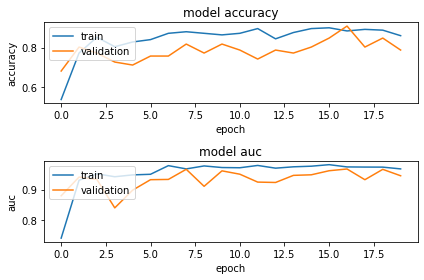

In [7]:

# Do Matplotlib extension below
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')
# Do Matplotlib extension below
fig.tight_layout()
fig.show()

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

model_predictions = model.predict(test_iterator, steps=(test_iterator.samples)/BATCH_SIZE)

predicted_classes = np.argmax(model_predictions, axis=1)
true_classes = test_iterator.classes
class_labels = list(test_iterator.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))   

print("Confusion Matrix:")
print(confusion_matrix(true_classes,predicted_classes, labels = [0,1,2]))

2/2 [==============================] - 2s 752ms/step
Classification Report:
                 precision    recall  f1-score   support

          Covid       0.43      0.38      0.41        26
         Normal       0.43      0.30      0.35        20
Viral Pneumonia       0.34      0.50      0.41        20

       accuracy                           0.39        66
      macro avg       0.40      0.39      0.39        66
   weighted avg       0.41      0.39      0.39        66

Confusion Matrix:
[[10  4 12]
 [ 7  6  7]
 [ 6  4 10]]


/var/folders/rq/t1zwhw110z107g7z9_lt036m0000gn/T/ipykernel_54624/2003736706.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


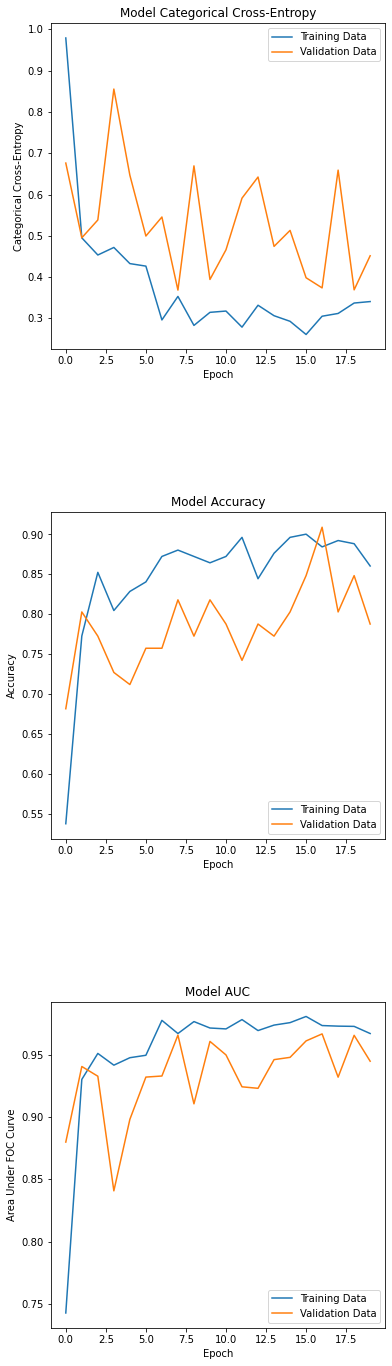

In [14]:
fig = plt.figure(figsize=(6,24))
'''Make sure there is enough space between sub-plots: '''
fig.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Categorical Cross-Entropy')
ax1.set_ylabel('Categorical Cross-Entropy')
ax1.set_xlabel('Epoch')
ax1.legend(['Training Data', 'Validation Data'], loc='upper right')

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(history.history['categorical_accuracy'])
ax2.plot(history.history['val_categorical_accuracy'])
ax2.set_title('Model Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['Training Data', 'Validation Data'], loc='lower right')

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(history.history['auc'])
ax3.plot(history.history['val_auc'])
ax3.set_title('Model AUC')
ax3.set_ylabel('Area Under FOC Curve')
ax3.set_xlabel('Epoch')
ax3.legend(['Training Data', 'Validation Data'], loc='lower right')

fig.show()